In [5]:
#loading dataset
import pandas as pd
df = pd.read_csv('/content/Titanic-Dataset (1).csv')
print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Calculate and display descriptive statistics (mean, median, standard deviation, quartiles, etc.)  


In [2]:
print("Descriptive statistics for numerical features:")
df.describe()

Descriptive statistics for numerical features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize Numerical Features


---

Generating histograms and boxplots for numerical features:


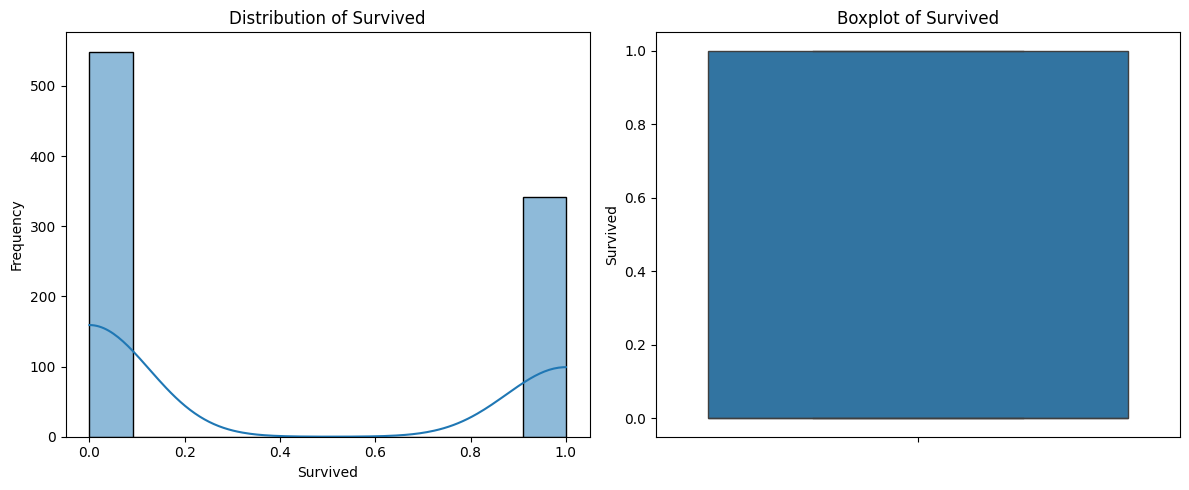

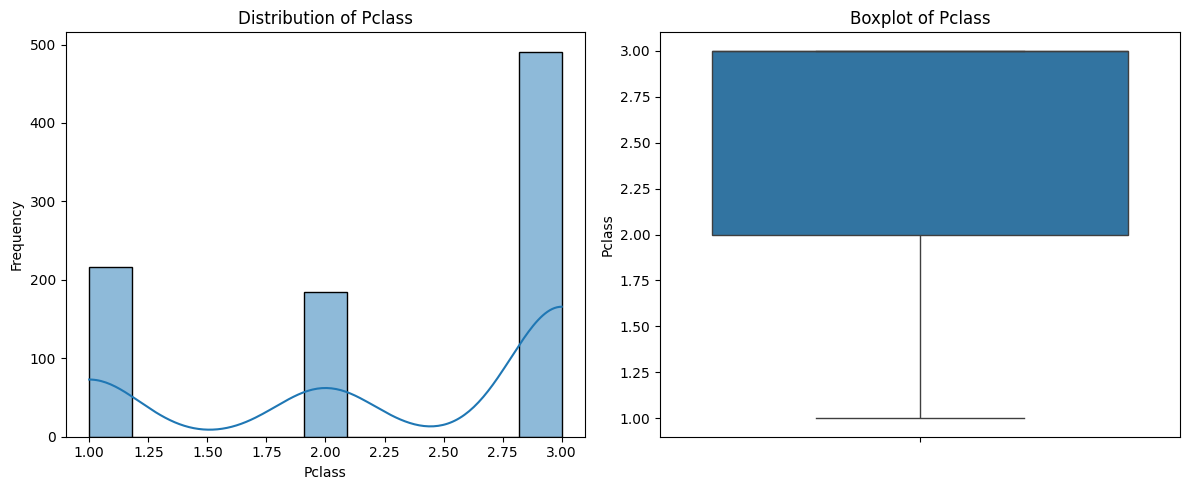

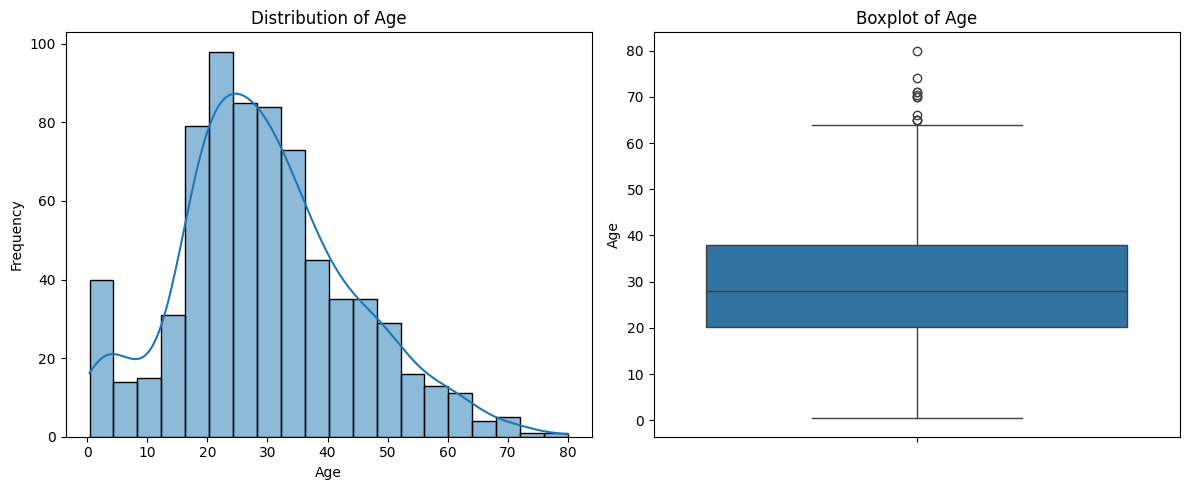

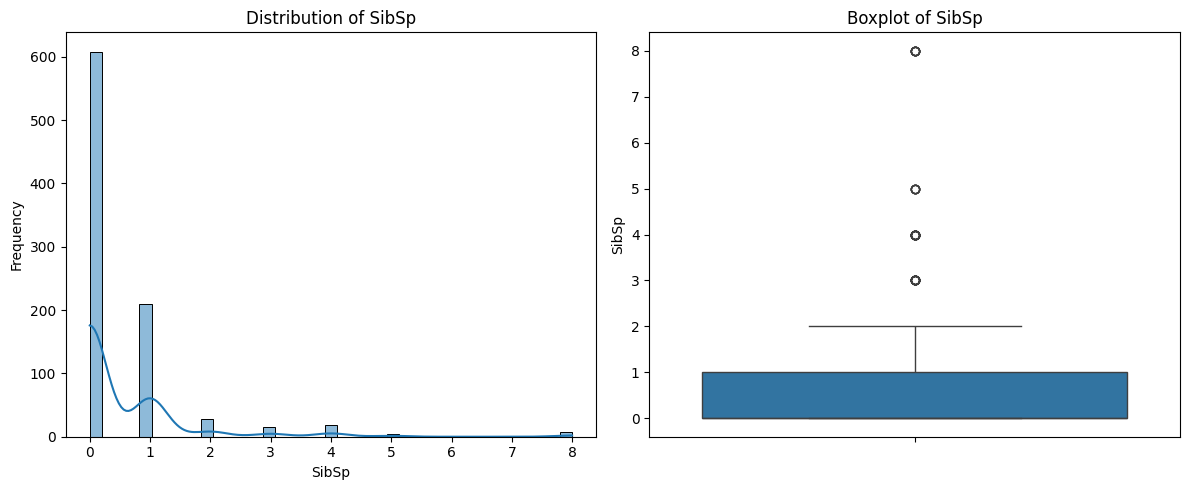

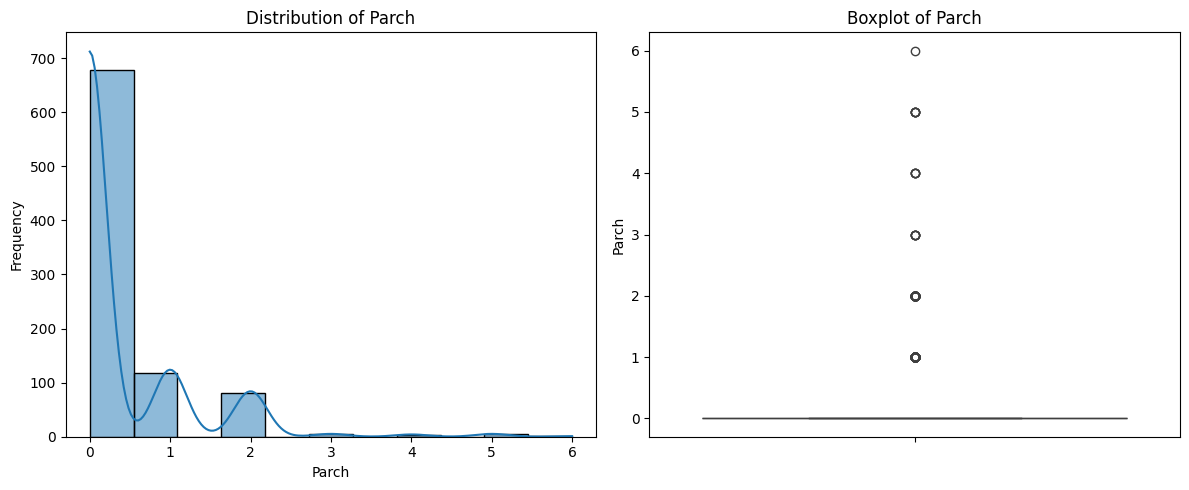

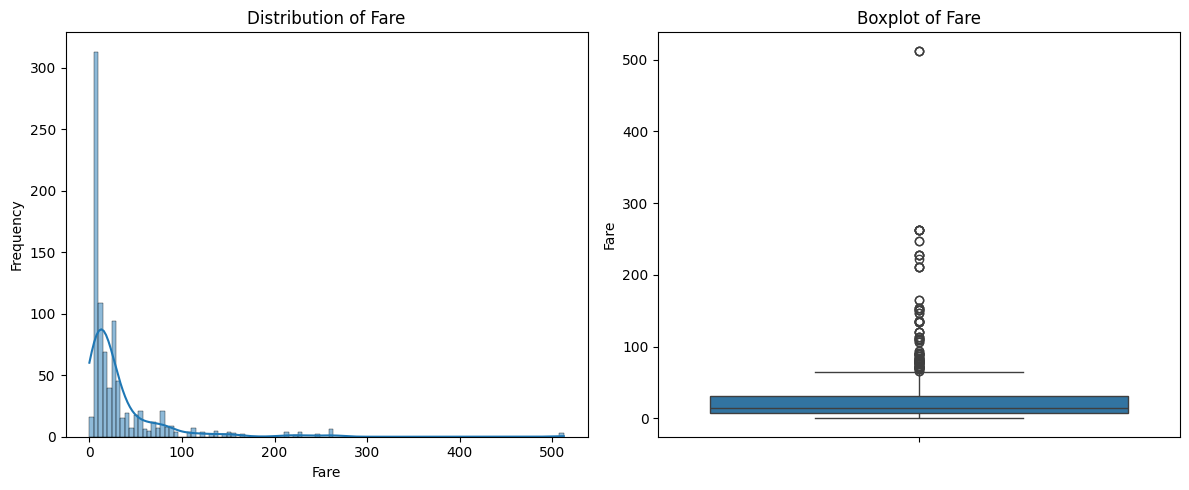

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

print("Generating histograms and boxplots for numerical features:")

for col in numerical_cols:
    if col not in ['PassengerId']:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
        sns.boxplot(y=df[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)

        plt.tight_layout()
        plt.show()

## Analyze Feature Relationships



Correlation Matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


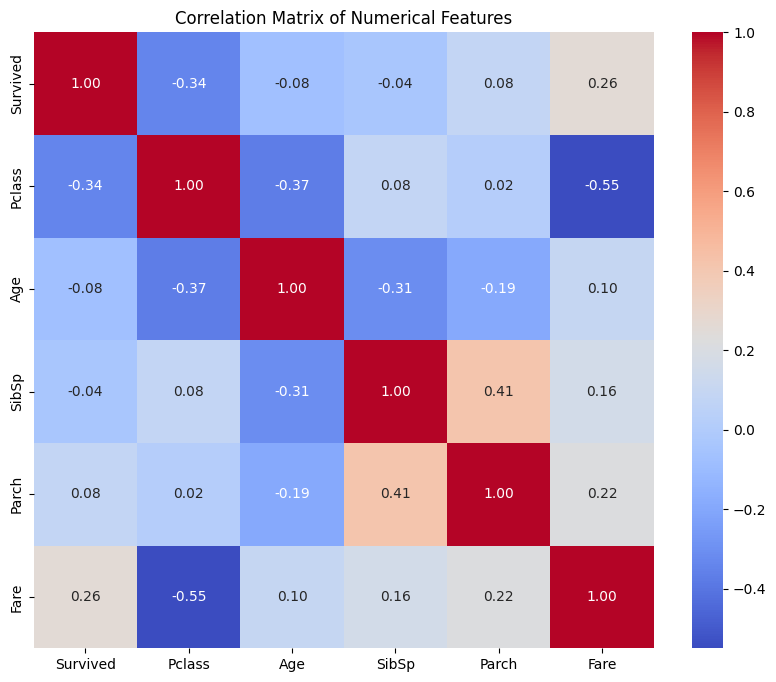


Generating Pairplot for Numerical Features:


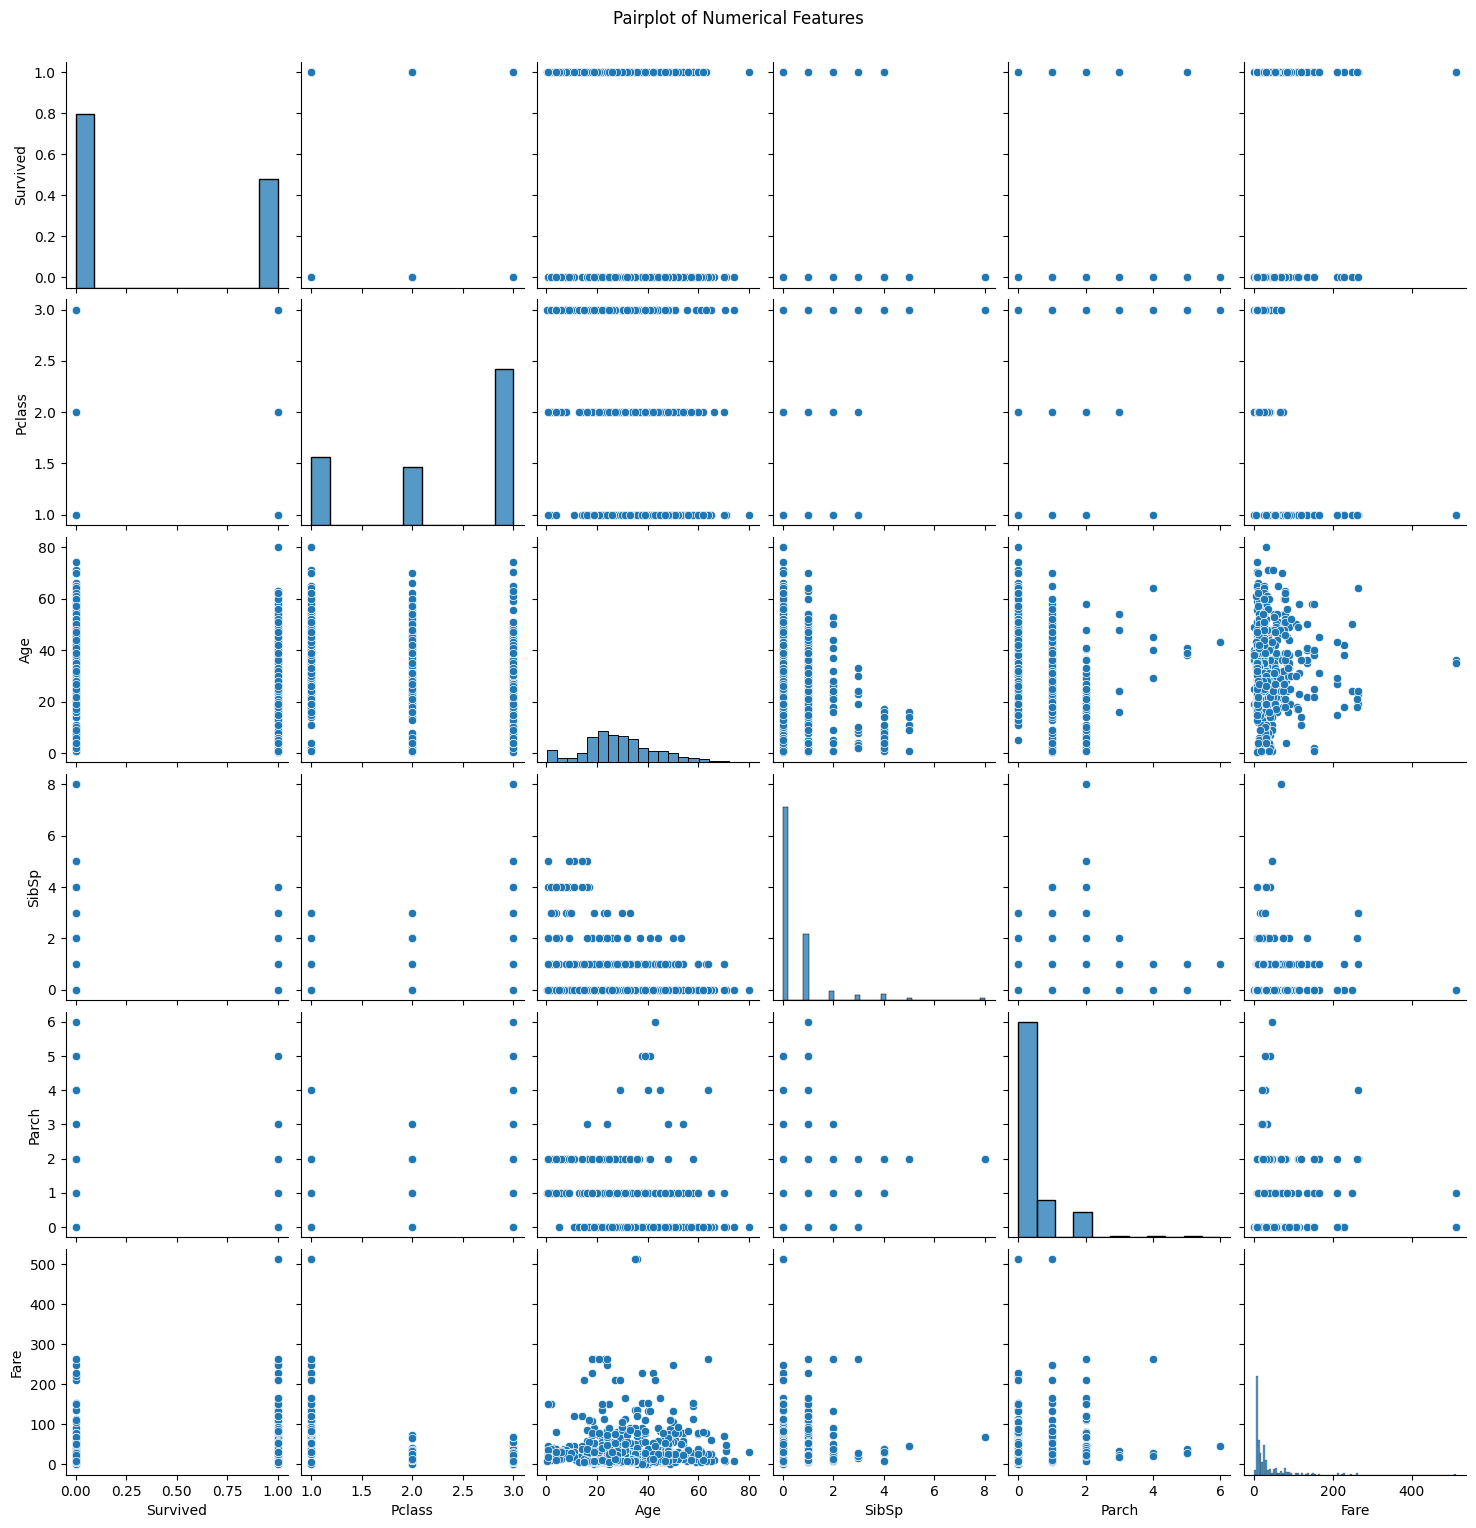

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns excluding 'PassengerId'
numerical_cols_for_corr = df.select_dtypes(include=['number']).columns.drop('PassengerId', errors='ignore')

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols_for_corr].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Generate a pairplot for numerical columns
print("\nGenerating Pairplot for Numerical Features:")
sns.pairplot(df[numerical_cols_for_corr])
plt.suptitle('Pairplot of Numerical Features', y=1.02) # Adjust title position
plt.show()